In [1]:
import pandas as pd

In [2]:
data=pd.read_excel(r"C:\Users\User\Downloads\food_recommendation_survey_results 1.xlsx",sheet_name='Survey Response')
data.head(2)

,User ID,Mood,Cuisine,Food Item_1,Rating_1,Food Item_2,Rating_2,Food Item_3,Rating_3
0,1,Sad,Snack,gulab jamun,4,Egg Curry with Tomatoes and Cilantro,4,steam bunny chicken bao,9
1,2,Tired,Mexican,japanese curry arancini with barley salsa,4,vegetable bruschetta,2,kaju katli,9


In [108]:
food_data=pd.read_csv(r"C:\Users\User\Downloads\food_details_trimmed (1).csv")
food_data.head(2)

,Unnamed: 0,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
1,5,6,japanese curry arancini with barley salsa,Japanese,veg,"japanese curry, sticky rice, cheese inside ric..."


In [110]:
food_list=food_data['Name'].unique()
food_list

array(['chicken minced salad',
       'japanese curry arancini with barley salsa',
       'baked multigrain murukku', 'baked namak para',
       'spinach and feta crepes', 'mixed berry & banana smoothie',
       'khichdi', 'steam bunny chicken bao', 'meat lovers pizza',
       'chicken parmigiana with tomato sauce',
       'caramelized sesame smoked almonds', 'detox haldi tea',
       'grilled lemon margarita', 'filter coffee',
       'peri peri chicken satay', 'chicken biryani',
       'buldak (hot and spicy chicken)', 'spicy chicken masala',
       'chilli chicken', 'chicken tenders',
       'chicken and mushroom lasagna', 'chicken roulade',
       'chicken shami kebab', 'fish with white sauce',
       'chettinad fish fry', 'spanish fish fry', 'green cucumber shots',
       'veg fried rice', 'chicken paella', 'vegetable pulao',
       'vegetable bruschetta', 'egg and cheddar cheese sandwich',
       'egg in a blanket', 'kaju katli', 'mixed vegetable soup',
       'chocolate lava cake

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User ID      1021 non-null   int64 
 1   Mood         1021 non-null   object
 2   Cuisine      1021 non-null   object
 3   Food Item_1  1021 non-null   object
 4   Rating_1     1021 non-null   int64 
 5   Food Item_2  1021 non-null   object
 6   Rating_2     1021 non-null   int64 
 7   Food Item_3  1021 non-null   object
 8   Rating_3     1021 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 71.9+ KB


In [4]:
data['User ID'].nunique()

1021

In [5]:
# data=data.rename(columns={'Select the food item (Food Item 1)':'food_item_1','Select the food item (Food Item 2)':'food_item_2',
#                     'Select the food item (Food Item 3)':'food_item_3','How would you rate this food item ?':'rating_1',
#                     'How would you rate this food item ?2':'rating_2','How would you rate this food item ?3':'rating_3'})
data.columns

Index(['User ID', 'Mood', 'Cuisine', 'Food Item_1', 'Rating_1', 'Food Item_2',
       'Rating_2', 'Food Item_3', 'Rating_3'],
      dtype='object')

In [6]:
data.head(2)

,User ID,Mood,Cuisine,Food Item_1,Rating_1,Food Item_2,Rating_2,Food Item_3,Rating_3
0,1,Sad,Snack,gulab jamun,4,Egg Curry with Tomatoes and Cilantro,4,steam bunny chicken bao,9
1,2,Tired,Mexican,japanese curry arancini with barley salsa,4,vegetable bruschetta,2,kaju katli,9


In [7]:
data.shape

(1021, 9)

In [8]:
data.columns

Index(['User ID', 'Mood', 'Cuisine', 'Food Item_1', 'Rating_1', 'Food Item_2',
       'Rating_2', 'Food Item_3', 'Rating_3'],
      dtype='object')

In [13]:
data.head(5)

,User ID,Mood,Cuisine,Food Item_1,Rating_1,Food Item_2,Rating_2,Food Item_3,Rating_3
0,1,Sad,Snack,gulab jamun,4,Egg Curry with Tomatoes and Cilantro,4,steam bunny chicken bao,9
1,2,Tired,Mexican,japanese curry arancini with barley salsa,4,vegetable bruschetta,2,kaju katli,9
2,3,Happy/Cheerful,Dessert,caramelized sesame smoked almonds,9,spicy chicken masala,5,Garlic Naan,3
3,4,Happy/Cheerful,Snack,chicken minced salad,6,fruit cube salad,3,veg hakka noodles,7
4,5,Neutral/Calm/Relaxed,Italian,egg and cheddar cheese sandwich,9,chocolate lava cake,8,peri peri chicken satay,9


In [9]:
# data=data[['User ID', 'Mood', 'Cuisine','food_item_1', 'rating_1', 'food_item_2', 'rating_2', 'food_item_3','rating_3']]
# data

In [32]:
data.columns

Index(['User ID', 'Mood', 'Cuisine', 'Food Item_1', 'Rating_1', 'Food Item_2',
       'Rating_2', 'Food Item_3', 'Rating_3'],
      dtype='object')

In [50]:
rating_data = pd.melt(data, id_vars=['User ID','Mood','Cuisine'], 
                  value_vars=['Food Item_1', 'Rating_1', 'Food Item_2',
       'Rating_2', 'Food Item_3', 'Rating_3'],
                  var_name='food_rating', value_name='value')

# Separate food IDs and ratings
food_df = rating_data[rating_data['food_rating'].str.contains('Food')].rename(columns={'Value': 'Food'}).drop('food_rating', axis=1)
rating_df = rating_data[rating_data['food_rating'].str.contains('Rating')].rename(columns={'Value': 'Rating'}).drop('food_rating', axis=1)

final_df = pd.concat([food_df.reset_index(drop=True), rating_df.reset_index(drop=True)], axis=1)

final_df = final_df.T.drop_duplicates().T
final_df.columns = ['user_id','Mood','Cuisine', 'food_name', 'rating']

In [51]:
final_df.head(2)

,user_id,Mood,Cuisine,food_name,rating
0,1,Sad,Snack,gulab jamun,4
1,2,Tired,Mexican,japanese curry arancini with barley salsa,4


In [52]:
final_df[final_df['user_id']== 1]

,user_id,Mood,Cuisine,food_name,rating
0,1,Sad,Snack,gulab jamun,4
1021,1,Sad,Snack,Egg Curry with Tomatoes and Cilantro,4
2042,1,Sad,Snack,steam bunny chicken bao,9


In [54]:
final_df

,user_id,Mood,Cuisine,food_name,rating
0,1,Sad,Snack,gulab jamun,4
1,2,Tired,Mexican,japanese curry arancini with barley salsa,4
2,3,Happy/Cheerful,Dessert,caramelized sesame smoked almonds,9
3,4,Happy/Cheerful,Snack,chicken minced salad,6
4,5,Neutral/Calm/Relaxed,Italian,egg and cheddar cheese sandwich,9
...,...,...,...,...,...
3058,1017,Neutral/Calm/Relaxed,Dessert,baked multigrain murukku,2
3059,1018,Sad,Dessert,chicken paella,7
3060,1019,Sad,French,mixed vegetable soup,1
3061,1020,Neutral/Calm/Relaxed,Indian,dry fruit cake,6


In [55]:
final_df.shape

(3063, 5)

In [56]:
final_df.describe()

,user_id,Mood,Cuisine,food_name,rating
count,3063,3063,3063,3063,3063
unique,1021,5,10,54,10
top,1,Angry/Frustrated,Dessert,dry fruit cake,9
freq,3,687,360,76,365


In [57]:
final_df['rating'].value_counts()

9     365
5     326
7     313
3     309
8     307
1     302
6     297
4     295
2     284
10    265
Name: rating, dtype: int64

In [59]:
final_df.columns

Index(['user_id', 'Mood', 'Cuisine', 'food_name', 'rating'], dtype='object')

In [58]:
# !pip install Sweetviz

In [60]:
final_df['Mood'].unique()

array(['Sad', 'Tired', 'Happy/Cheerful', 'Neutral/Calm/Relaxed',
       'Angry/Frustrated'], dtype=object)

# Top 3 Food items by mood

In [63]:
for i in final_df['Mood'].unique():
    mood_df=final_df[final_df['Mood']==i]
    mood_df=mood_df.sort_values(by='rating',ascending=False)
    x=mood_df.iloc[0:3]
    food_list=x['food_name'].to_list()
    rating_list=x['rating'].to_list()
    print(f"The top 3 foods that people who were {i} rated highest are {food_list} with ratings of {rating_list}")

The top 3 foods that people who were Sad rated highest are ['chicken tenders', 'spicy chicken masala', 'japanese curry arancini with barley salsa'] with ratings of [10, 10, 10]
The top 3 foods that people who were Tired rated highest are ['pasta in cheese sauce', 'chicken parmigiana with tomato sauce', 'veg fried rice'] with ratings of [10, 10, 10]
The top 3 foods that people who were Happy/Cheerful rated highest are ['veg hakka noodles', 'spanish fish fry', 'chicken paella'] with ratings of [10, 10, 10]
The top 3 foods that people who were Neutral/Calm/Relaxed rated highest are ['chicken biryani', 'fish with white sauce', 'dry fruit cake'] with ratings of [10, 10, 10]
The top 3 foods that people who were Angry/Frustrated rated highest are ['chicken tikka masala', 'filter coffee', 'butter chicken'] with ratings of [10, 10, 10]


# Bottom 3 Food items by mood

In [64]:
for i in final_df['Mood'].unique():
    mood_df=final_df[final_df['Mood']==i]
    mood_df=mood_df.sort_values(by='rating',ascending=False)
    x=mood_df.tail(3)
    food_list=x['food_name'].to_list()
    rating_list=x['rating'].to_list()
    print(f"The 3 foods that people who were {i} rated lowest are {food_list} with ratings of {rating_list}")

The 3 foods that people who were Sad rated lowest are ['chicken parmigiana with tomato sauce', 'chocolate lava cake', 'mixed vegetable soup'] with ratings of [1, 1, 1]
The 3 foods that people who were Tired rated lowest are ['pasta in cheese sauce', 'butter chicken', 'meat lovers pizza'] with ratings of [1, 1, 1]
The 3 foods that people who were Happy/Cheerful rated lowest are ['meat lovers pizza', 'vegetable pulao', 'veg hakka noodles'] with ratings of [1, 1, 1]
The 3 foods that people who were Neutral/Calm/Relaxed rated lowest are ['butter chicken', 'dry fruit cake', 'Channa Masala'] with ratings of [1, 1, 1]
The 3 foods that people who were Angry/Frustrated rated lowest are ['veg fried rice', 'egg in a blanket', 'chicken minced salad'] with ratings of [1, 1, 1]


# Cuisine Preferences by mood

In [65]:
gr=final_df.groupby(['Mood','Cuisine'],as_index=False)['Cuisine'].size().reset_index(drop=True)
for i in gr['Mood'].unique():
    mood_df=gr[gr['Mood']==i]
    mood_df=mood_df.sort_values(by='size',ascending=False)
    x=mood_df.iloc[0]
#     food_list=x['Food'].to_list()
#     rating_list=x['Rating'].to_list()
    print(f"The people who were {i} preferred {x['Cuisine']} the most, with total orders amounting to {x['size']}")

The people who were Angry/Frustrated preferred Dessert the most, with total orders amounting to 87
The people who were Happy/Cheerful preferred Chinese the most, with total orders amounting to 78
The people who were Neutral/Calm/Relaxed preferred Japanese the most, with total orders amounting to 81
The people who were Sad preferred Snack the most, with total orders amounting to 78
The people who were Tired preferred Mexican the most, with total orders amounting to 87


In [79]:
final_df['rating'] = pd.to_numeric(final_df['rating'])

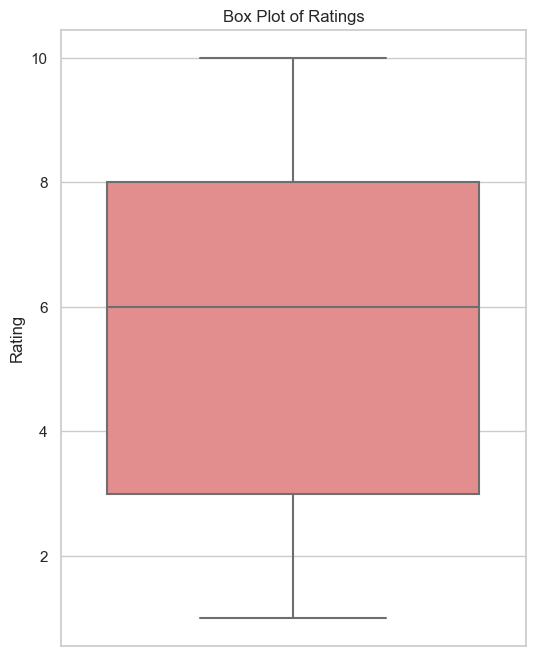

In [111]:
# Plot box plot
plt.figure(figsize=(6, 8))
sns.boxplot(y=final_df['rating'], color='lightcoral')
plt.title('Box Plot of Ratings')
plt.ylabel('Rating')
save_path = r'C:\Users\User\OneDrive\Desktop\sindhu\Sindhu ISB\Term-2\Foundational Project 1\ratings_box_plot.png'
plt.savefig(save_path)
plt.show()


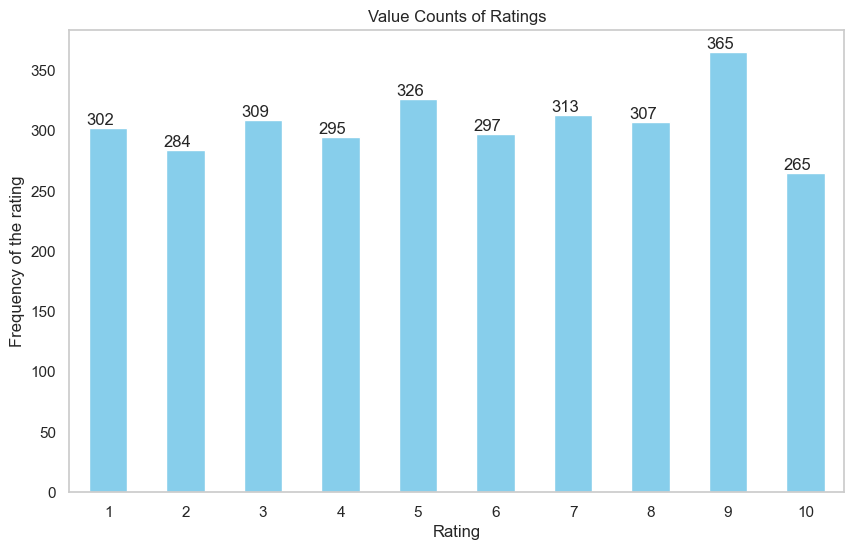

In [88]:
# frequency of ratings
rating_counts = final_df['rating'].value_counts().sort_index()
# bar plot
plt.figure(figsize=(10, 6))
bars = rating_counts.plot(kind='bar', color='skyblue')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom')
plt.title('Value Counts of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency of the rating')
plt.xticks(rotation=0)
plt.grid(False)
save_path = r'C:\Users\User\OneDrive\Desktop\sindhu\Sindhu ISB\Term-2\Foundational Project 1\value_counts.png'
plt.savefig(save_path)
plt.show()

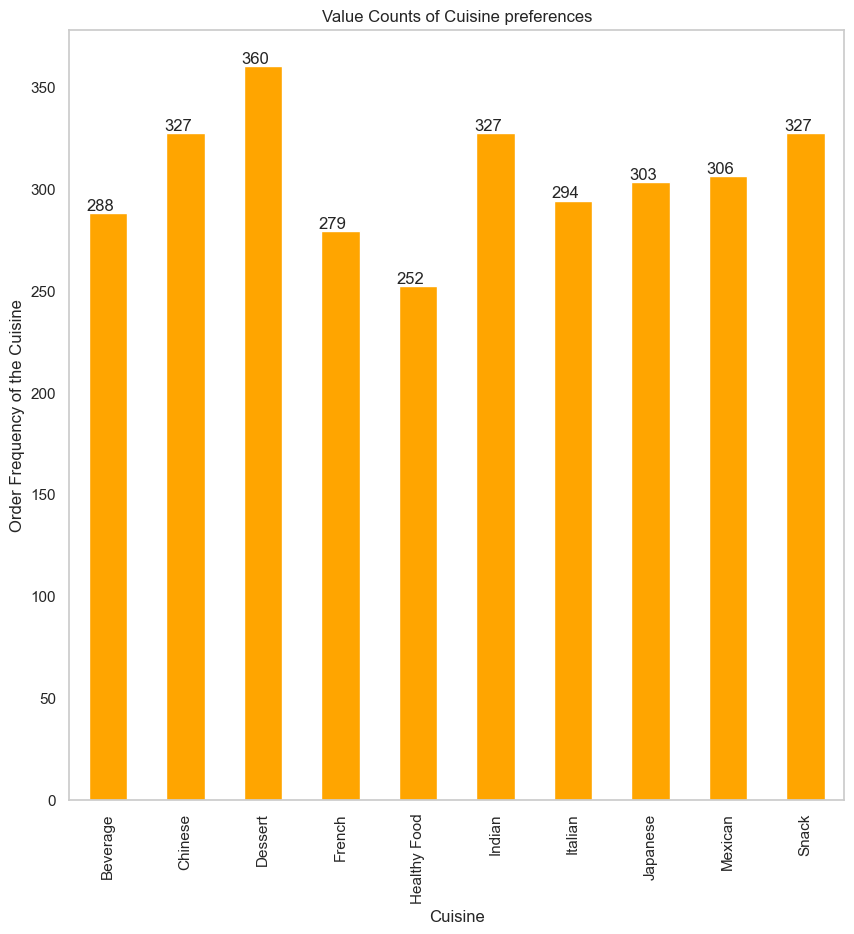

In [97]:
# frequency of cuisine
rating_counts = final_df['Cuisine'].value_counts().sort_index()
# bar plot
plt.figure(figsize=(10, 10))
bars = rating_counts.plot(kind='bar', color='orange')
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.1, str(int(bar.get_height())), ha='center', va='bottom')
plt.title('Value Counts of Cuisine preferences')
plt.xlabel('Cuisine')
plt.ylabel('Order Frequency of the Cuisine')
plt.xticks(rotation=90)
plt.grid(False)
save_path = r'C:\Users\User\OneDrive\Desktop\sindhu\Sindhu ISB\Term-2\Foundational Project 1\value_counts_cuisine.png'
plt.savefig(save_path)
plt.show()

In [100]:
final_df

,user_id,Mood,Cuisine,food_name,rating
0,1,Sad,Snack,gulab jamun,4
1,2,Tired,Mexican,japanese curry arancini with barley salsa,4
2,3,Happy/Cheerful,Dessert,caramelized sesame smoked almonds,9
3,4,Happy/Cheerful,Snack,chicken minced salad,6
4,5,Neutral/Calm/Relaxed,Italian,egg and cheddar cheese sandwich,9
...,...,...,...,...,...
3058,1017,Neutral/Calm/Relaxed,Dessert,baked multigrain murukku,2
3059,1018,Sad,Dessert,chicken paella,7
3060,1019,Sad,French,mixed vegetable soup,1
3061,1020,Neutral/Calm/Relaxed,Indian,dry fruit cake,6


# Most ordered Food items and average ratings

In [107]:
gr = final_df.groupby(['food_name'], as_index=False).agg(size=('food_name', 'size'), rating=('rating', 'mean'))
gr = gr.rename(columns={'food_name': 'food_name', 'size': 'size', 'rating': 'rating'})
x=gr.sort_values(by='size',ascending=False)
x
# for i in gr['Mood'].unique():
#     mood_df=gr[gr['Mood']==i]
#     mood_df=mood_df.sort_values(by='size',ascending=False)
#     x=mood_df.iloc[0]
# #     food_list=x['Food'].to_list()
# #     rating_list=x['Rating'].to_list()
#     print(f"The people who were {i} preferred {x['Cuisine']} the most, with total orders amounting to {x['size']}")

,food_name,size,rating
27,dry fruit cake,76,5.763158
9,baked namak para,71,5.450704
14,chettinad fish fry,69,4.985507
24,chilli chicken,67,5.358209
13,caramelized sesame smoked almonds,67,6.552239
30,filter coffee,66,5.212121
11,buldak (hot and spicy chicken),64,5.843750
17,chicken minced salad,64,5.515625
33,green cucumber shots,63,5.222222
16,chicken biryani,63,5.507937
